## Kawahsima lab python tutorials: 
## Analaysis of whole-brain neural dynamics


### Overview 

This course aims to provide an understanding of how to analyze large-scale neural activity in behaving animals. In this experiment, zebrafish adapt their swimming patterns while the visual stimuli move forward, backward and stop. We recorded neural activity across the entire brain at single-cell resolution during this behavior.  

#### Zebrafish's swimming behavior and neural activity. Movie is available from this link
https://www.dropbox.com/s/1h9j3k2ueufxk8q/activity_movie.mov?dl=0
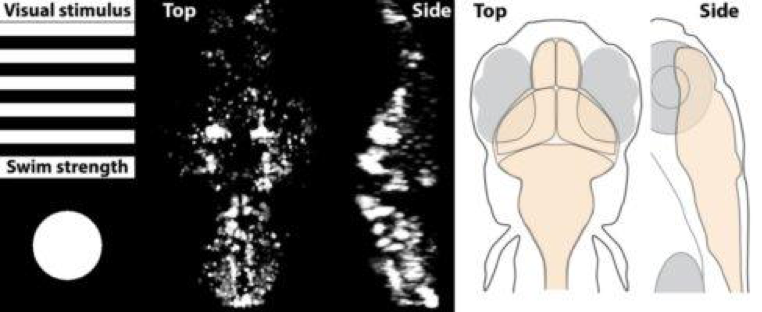

### Goals

In this tutorial, we learn how to perform following things.

(1) Connect iPython notebook to remote computational server

(2) Basic data handling and visualization

(3) How to compute and plot a perstimulus time historgram

(4) Visualization of 3-dimensional data

(5) Correlation between neural activity and behavioral variables

(6) Low-dimensionality reduction of large-scale activity data


### Section 1. Setting up your iPython Notebook

#### 1-1. Downloading iPython Notebook

iPython Notebook file for this tutorial is available from this link

https://www.dropbox.com/s/289zyryo941c0ag/Data%20analysis%20tutorial_ver2020_3.ipynb?dl=0

(Only local machine users) The dataset for this tutorial is available from this link

https://www.dropbox.com/sh/h6txrzgg8yxedjq/AAA1TRUji_b6X6l-D-jtfaQ_a?dl=0


#### 1-2. Setting up in a remote server

In Kawashima lab, we run our front-end Python appliations (iPython notebook, Spyder IDE) using our local machine, while the back-end kernels (real computation) runs on a remote, powerful server (Intel Xeon Gold x 2, 384 GB memory, nVidia Tesla V100 etc). This"remote kernel" configuration allows you to perform big data analysis using your local machine. 

Please follow instrucitons in the below PDF file to connect to the server and install necessary software. Login info will be sent individually. You need to be in Weizmann Secured network or on VPN access.

https://www.dropbox.com/s/83wdskpyzlfbk8u/iPythonNotebook_installation_RemoteServer.pdf?dl=0

#### 1-3. Setting up in a local machine

You can also run this tutorial on your local machine, if it is powerful enough. Please follow instructions in the below PDF file.

https://www.dropbox.com/s/hqzkuuw5vxedvoi/iPythonNotebook_installation_LocalMachine.pdf?dl=0



### Section 2: Load the data, practice basic plots


Numpy and Matplotlib are Python libraries for math calculation and data visualization. We will practice basic usage of these libraries in this section.  

#### -Basic rules
[Enter] will change code lines in the cell

[Shift + Enter] will execute the code in the cell

You also need to load the library necessary for plotting, calculations, etc

In [12]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### enable interactive plot
%matplotlib widget 


You can check the variables in the workplace by right-cliking and opening "VariableInspectors"

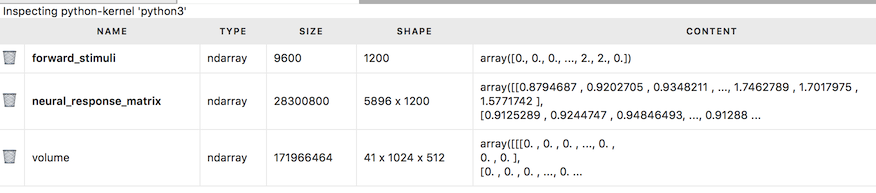

#### - Data location

All the data necesssary in this tutorial are in a folder 

##### **/scratch/data/MSc/2020_3/**
(if you run this on your local machine, this will be your directory you downloaded the data)

In this folder, we have 3 behavioral and 3 neural files.

##### **Behavioral data**

##### -  forward_stimuli.npy

##### -  backward_stimuli.npy

##### -  swim_power.npy

##### **Neural data**

##### -  volume.npy

##### -  selected_neural_response_matrix.npy

##### -  selected_neural_position_ZYX.npy


### Section 2-1: Load behavioral data

We have three behavioral files. Each file has 1200 time points (1 Hz).

##### forward_stimuli    ->   forward velocity value of visual stimuli 
##### backward_stimuli   ->    backward velocity value of visual stimuli
##### swim_power   ->   zebrafish's swimming power  

Note that the first two variables originally come from motions of the same visual stimuli. We splitted it positive and negative values into "forward" and "backward" for convenience because these different directions of motions trigger different sets of neural activity patterns across the brain 

In [17]:
forward_stimuli=np.load('/scratch/data/MSc/2020_3/forward_stimuli.npy')[()]

plt.figure(figsize=(8,2))
plt.plot(forward_stimuli)
plt.ylabel('visual velocity')
plt.xlabel('time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'time (s)')

In [ ]:
#Exercise : load and plot backward stimuli data



In [ ]:
#Exercise : load and plot swim power data



### Section 2-2: Load neural response data

We have two activity datasets, one small and one big. Each file has 1200 time points (1Hz).

##### selected_neural_response_matrix    ->   neural activity of 5,896 neurons (statistically selected for respone robustness)
##### neural_response_matrix -> full neural activit of 100,080 neurons across the entire brain

We will focus on selected neural response first, because it's smaller and easier to handle.



In [3]:
# load neural response data

neural_response_matrix=np.load('/scratch/data/MSc/Data/selected_neural_response_matrix.npy')[()]


In [ ]:
#Exercise: get the number of cells from the matrix shape




#### Show the response of first 10 neurons like this
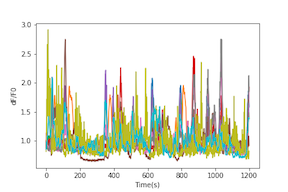

In [ ]:
#Excersize: show the response of first 10 neurons like the above




#### Using subplot, show the response of first 10 neurons in a different way like this

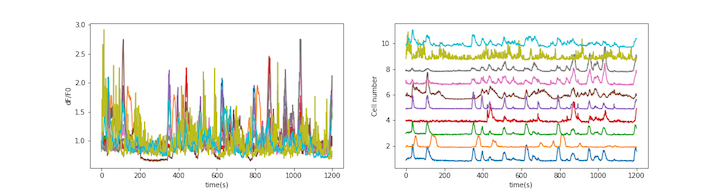

In [ ]:
#Excersize: Using subplot, show the response of first 10 neurons in a different way like the above



In [ ]:
#Excersize: Using subplot, show the response of every 500th neuron like the above



#### Making a function that shows response of neurons 

In python, you can define an in-line function wherever necessary. Something like this for example:



In [ ]:
def show_matrix_size(X):
    print(X.shape)
    
show_matrix_size(neural_response_matrix)


By using this function, make an in-line function that shows the cell response of given # in two ways like the above.

In [ ]:
#Excersize: Make an inline-function for showing cellular activity given neuron #s




### Section 2-3: Stimulus_triggered average

How do neurons respond to behavioral variables, such as visual stimulus or swimming events? We'll explore the relationship between neural activity of a particular neuron and behavioral variables.

We focus on neuron #2414. It shows an interesting activity patterns.

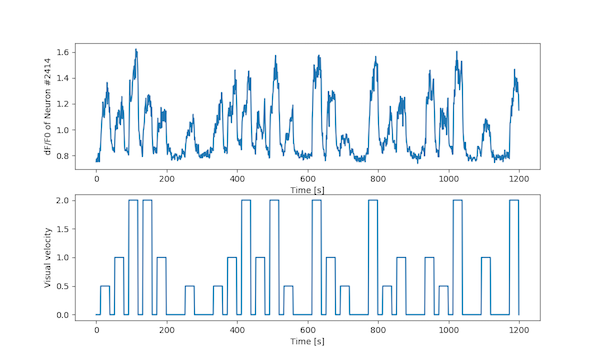

In [ ]:
# Excersize. Plot the above plot




#### Compute the stimulus triggered_average

We'll do this in the following three steps

1. We detect the stimulus onset frame by thresholding the forward visual velocity. 
2. We collect neural signals of neuron #2414 around the onset from the stimulu (-5 to +10 frames)
3. We average neural signals
4. We do this for different visual velocities

In [ ]:
# Exercise 1: get frame indices for the onsets of visual stimuli

# Hint: use np.where and np.diff




In [ ]:
# Exercise 2: pool visual velocity around the above detected

# Hint: create a matrix (event number x time points). Put visual velocity from each event to each row



In [ ]:
# Exercise 3: pool activity trace of neuron #2414 around the above detected




individual and average traces of the pooled data will look like this. Cyan represents individual traces. Red represents average across events. 

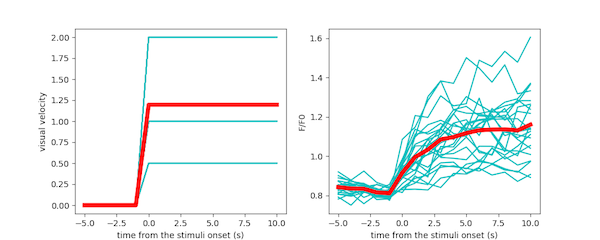

Let's plot this

In [ ]:
# Exercise 4: average visual velocity and activity across events as the above





#### Let's plot average response for different forward visual velocities (0.5, 1, 2) in different colors on the same panel

In [ ]:
# Advanced Exercise 1: plot the above average individually for different forward visual velocities

# Hint: prepare a index by which you classify the visual stimulus (such as 1d vector (1,3,2,2...)




#### Let's do the same thing for the backward stimulus 

In [ ]:
# Advanced Exercise 2: plot the above average individually for different backward visual velocities





#### Open question for Section 2: 
#### Please suggest, perform and plot one analysis on the relationship between behavioral variables and neural activity

In [15]:
# Please suggest, perform and plot an analysis from your own idea!""





### Section 3: Visualization and indexing of a 3-dimensional volume

#### 3.1 Projections

There are multiple ways of projecting a 3D volume (ZYX) to a 2D image.

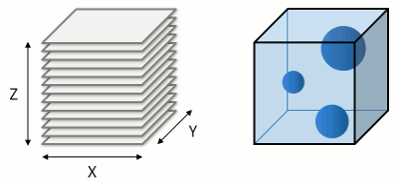

Dimensions are in the order of [Z, Y, X]

Maximum, Minimum, Sum, Average....

#### 3.2 Example of summation projection:

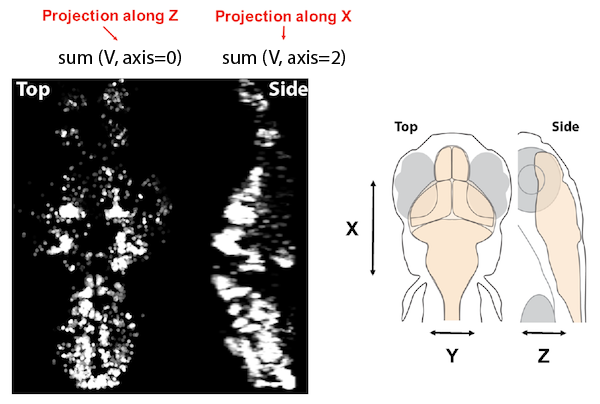

#### Let's practice basic projections using "Volume.npy"

In [ ]:
# Exercise: load an anatomical volume



# Show summation projection along tye Z axis using plt.imshow(), in a grayscale mode




# Want to make it brighter? Image looks dim because it's normalized by the brightest outlier. 
# You can set vmax option as 90 percentile. 
# Hint, use np.percentile()




#### Exercise: show the Z projection and X projection at the same time

X projection is tricky in that z dimension is much undersampled as compared to XY dimensions. Play with 'aspect' option of imshow. If you get the right value, you will see something like this.

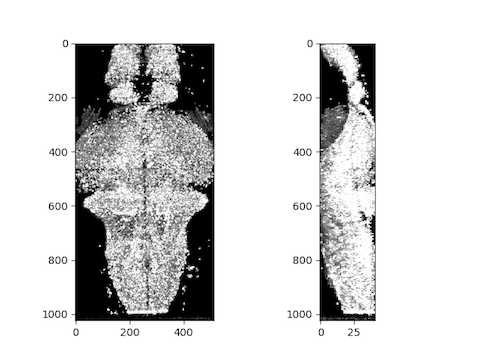

In [ ]:
#Exercise: show the Z projection and X projection at the same time

neural_response_matrix=np.load('/scratch/data/MSc/Data/selected_neural_response_matrix.npy')[()]




In [ ]:
# Exercise: show the Z projection and X projection for "max" projection. 
# How is it different from "sum" projection?




#### 3.3 plotting cell locations:

Load locations of cells from "/scratch/data/MSc/Data/selected_neural_position_ZYX.npy"

This matrix is ([neuron num] x 3 x [pix number]).
the middle dimension represents Z, Y, X respectively.

So, if you want to plot a location of a cell, it will be something like

cell_inds=neural_position_ZYX[(Cell #), :, :]

cell_volume[cell_inds[2,:], cell_inds[0,:], cell_inds[1,:]]=1


You can easily scale this up to all cells like below

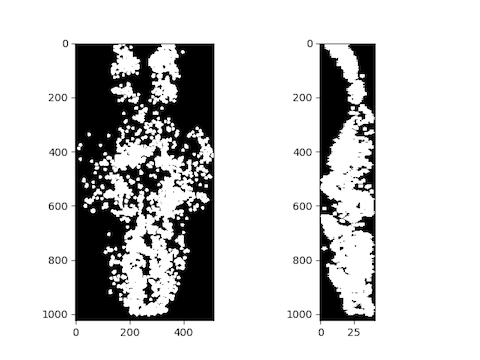

Let's map a position of cells and project it in many ways


In [2]:
# Exercise: load the cell position 




In [ ]:
# Exercise: Prepare an empty volume matrix. Map the cell position of neuron #2414. 
# Show Z projection. 




In [ ]:
# Exercise: Map the position of all cells. Show Z and X projections.





By "adding" values (instead of filling) and performing summation projection,you can also create a density map.


In [ ]:
# Exercise: Map the deinsity of all cells . 
# Show Z and X projections at the same time.




#### 3.4 Advanced Exercise. Plot locations of cells in different colors.

We can do this by superimposing cells on a color matrix (M x N x 3), respectively for Z and X projection. We can set a saturated color ((R,G,B)=(1,0,0) for red, for example) to the position of each cells.

Let's use below colortable

[1,0,0] (red)

[1,1,0] (yellow)

[1,0,1] (magenta)

[0,1,0] (green)

[0,1,1] (cyan)

[0,0,1] (blue)




In [ ]:
# Advanced exercise: plot positions of every 1000 neurons in differnt colors.
# show Z projection as well as X projection





### Section 4: Correlation of neural activity and behavioral variables

### 4.1 Checking correlation by a scatter plot

First, let's see whether there is a rough correlation between forward stimuli motion and activity of neuron #2414. We make a plot like this. There is a clear correlation.

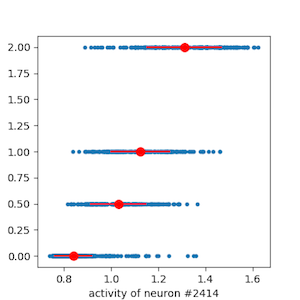

In [ ]:
#Excercise: Create a scatter plot between neural activity (#2414) and forward visual stimul




In [ ]:
#Advanced excercise: On the top of above scatter plot, 
# show average activity for each visual velocity like the above.
# Hint use plt.errorbar




### 4.2 Methods for calculating correlations

#### (1) Pearson's correlation coefficient ρ 

$$ \rho_{X,Y} =\frac{\text{Cov}\left(X,Y\right)}{\sigma_X \sigma_Y }=\frac{Ε\left\lbrack \left(X-\mu_X \right)\left(Y-\mu_Y \right)\right\rbrack }{\sigma_X \sigma_Y }$$

Cov is covariance. E is expectation.

$\mu_X$,$\mu_Y$ is the mean of X, Y

$\sigma_X$,$\sigma_Y$   is the standard deviation of X, Y

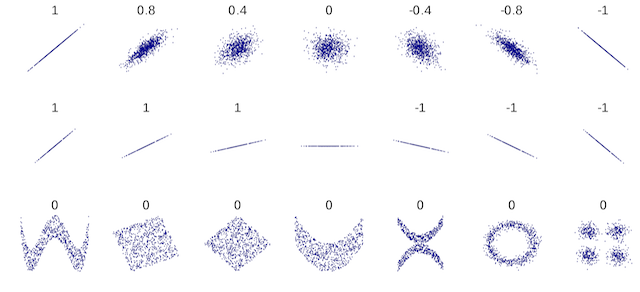

#### (2) Multiple linear regression

$$Y=\beta_0 +\beta_1 X_1 +\beta_2 X_2 +\beta_3 X_3 +\ldotp \ldotp \ldotp \ldotp$$

$X_1$, $X_2$,... are different variables

$\beta_0$ is constant (intercept)

$\beta_1$, $\beta_2$,... are regression coefficients

#### (3) Pairwise correlation v.s. multiple linear regression
- Difference between the two
- Meaning of Z-scoring
- Pros anc cons

### 4.3 Z-scoring

$$ Z =\frac{x-\mu_X}{\sigma_X}$$

Z-scoring is a process for shifting the vector mean to 0 and vector std to 1. Correlation coefficient is an inner product of Z-scored vectors. We also Z-score variables for multiple regression because this will allow fair comparison of coefficients $\beta$s between regressor variables. So let's begin from Z-scoring behavioral variables and neural activities.

Start from Z-scoring the swim power like this.

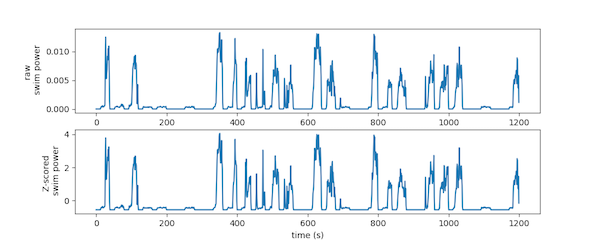

In [ ]:
## Exercise: Z-score swim power and show [1] raw swim power and [2] z-scored swim power like the above.

swim_power_norm = 



In [ ]:
## Exercise: Z-score forward visual stimuli and backward visual stimuli like the above. Plot them.

forward_stimuli_norm = 

backward_stimuli_norm = 



In [ ]:
## Exercise: Z-score activity trace of neuron #2414. Plot them

cell_trace_norm = 



In [ ]:
## Exercise: Z-score activity trace of all neurons. 

neural_response_matrix_norm =



### 4.4 Calculate correlations

Use np.corrcoef function to calculate correlations. 


In [ ]:
## Exercise: Calculate correration coefficient between activity of neuron #2414 and all 3 behavioral variables 
## Print the coefficients.




In [ ]:
## Exercise: Calculate the same set of correlation coefficietts for all neurons.





### 4.5 Create correlation map across the whole brain using blue-red colormap

For this plot, we will use a blue-red colormap called 'bwr'.
This colormap is optimized for showing things in a white background as below.

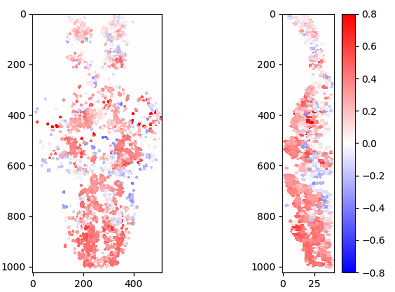

In [ ]:
# Excresize: plot the above correlation map.
# Prepare Z projection matrix ([Ypix] x [Xpix]) and X projection matrix ([Ypix] x [Zpix]). 
# Insert correlation coefficients to the location of each neurons in the projection matrices.







### 4.6 Convolving behavioral variables with calcium kernels

Calcium imaging signals overall reflect temporally smoothed firing rates of neurons. However, it is not symmetric in time. The rise phase is fast and the decay phase is slow. This is because the rise phase is mediated by passive ion channels and the decay phase is mediated by active transport pumps. The kinetics looks like this.

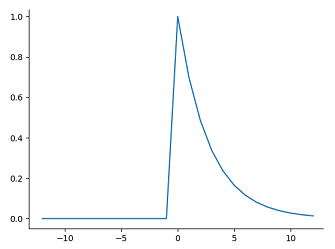

The decay phase can be modelled as an expotential decay. The half decay time is 2 s in my experiments.

As a result, suppose there will be a neuron of which firing rates perfectly follows the forward grating speed, its calcium trace would look like the bottom panel of the below. The bottom panel is a forward grating motion convolved with the above kernel. ___Note that you need to normalize the above kernel so that the sum becomes 1 to maintain the scale after convolution as the below.___

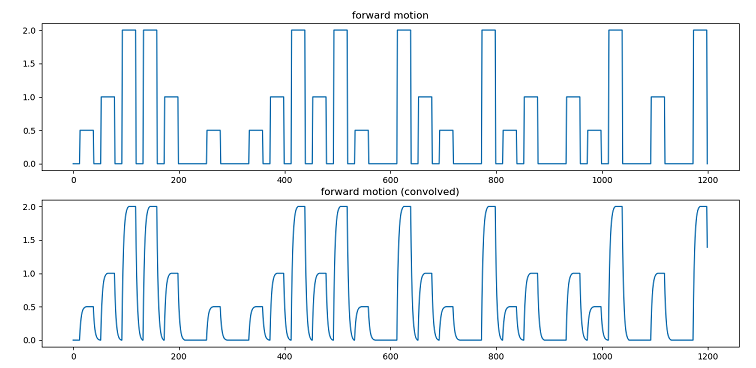

If you calculate the correlation with the convolved forward velocity, you see a better correlation as below.

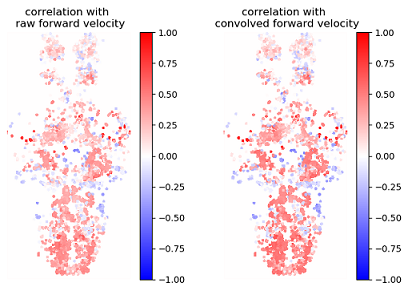

Let's replicate this result.

In [ ]:
#Excersize: Prepare the above calcium kernel. It is a matrix of 25 time points. Half decay time should be around 2s. Plot the kernel.





In [ ]:
#Excersize: Convolve the forward velocity variable with the above calcium kernel. Plot it.





In [ ]:
#Excersize: Compare between correlation maps using raw forward velocity and convolved forward velocity like the above





Let's apply the same calcium kernel convolution to backward velocity and swimm power. Create a neural activity correlation map for each. How do they look different from the above?

In [ ]:
# Excersize: Convolve backward velocity and swim power with the above calcium kernel. Do the same correlation map plot.
# Use 3 subplot panels to compare how neural activity correlation maps are different between neurons.




### 4.6 Multiple linear regression

$$Y=\beta_0 +\beta_1 X_1 +\beta_2 X_2 +\beta_3 X_3 +\ldotp \ldotp \ldotp \ldotp$$

So far we have been correlating individual behavioral variables to neural activities independently. But we can also fit them all at once to the neural activity to remove the redundancy between behavioral variables. For example, because fish swims in response to forward environmental motion, neurons that shows high correlations to forward velocity may actually encode swimming behavior. Multivariabe regression will get rid of such redundancies.

In the above equation, Y will be neural activity, and Xs will be behavioral variables. Behavioral varialbes needs to be convolved with calcium kernels and also Z-scopred. Neural activity traces also need to be Z-scored for individual neurons. Then we will perform this regression for each neuron and compare $\beta$s  to understand whic behavioral variable is dominant for each neuron. 

Let's do multivariate regression and check how it will be different from individual correlations.

In [5]:
# Excersize 1.
# (1) Convolve the behavioral variables with calcium kernels. Then Z-score them.
# (2) Z-score neural activity for each neuron
# (3) Perform multivariate regression to neuron #2414 using sklearn.linear_model.LinearRegression
# If you do it correctly, the regression coefficients 𝛽 are roughly [0.694, 0.007,0.35] (forward, backward, swim respectively) and the intercept will be 8.45e-07





In [ ]:
# Excersize 2.
# Do the regression to all neurons and get 𝛽s for each behavioral variables.
# Create a Z projection map for each 𝛽s like we did in Section 4.6 and 
# see which neurons are most correlated to forward velocity, backward velocity and swimming.
# Also create a Z projection map for intercept to check which neurons show more complex activity patterns that can't be explained by simple linear regression





#### Open question for Section 4: 
#### Suggest, perform and plot an analysis on the relationship among behavioral variables, neural activity and spatial positions.

In [7]:
# Please suggest, perform and plot an analysis from your own idea!""






### Section 5: Dimensionality reduction

Dimensionality reduction is an unsupervised learning method for describing large-scale neural activities from simple components. In the Section 4, we classified neurons based on its correlations to behavioral variables. In contrast, dimensionality reduction classify neurons based on the neural activity itself, not depending on behvaioral variables. This has pros and cons. Let's discuss. 

### (1) What is dimensionality reduction? Why necessary?
 - Difficulty of large-scale dataset
 - Difference from regression analysis
 
### (2) PCA (principal component analysis) v.s. NMF (Non-negative matrix factorization)
 - Difference
 - Pros anc cons
 - What's suited for calcium imaging?
 
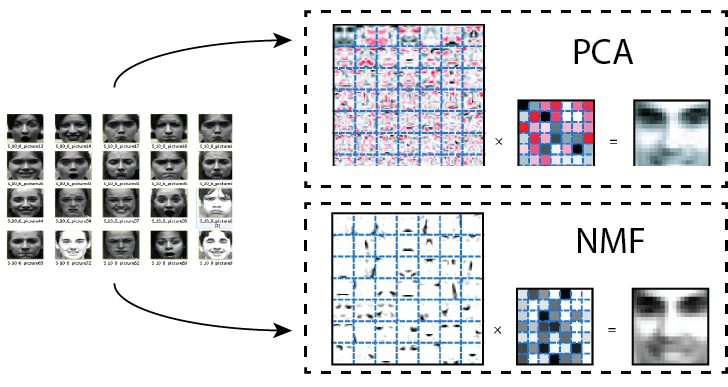

You can apply this method to zebrafish imaging data as well to cluster neurons.

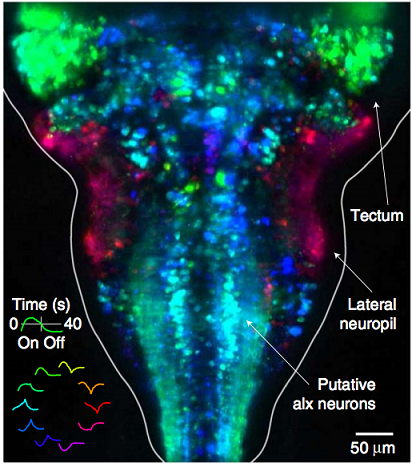

From Freeeman et al., 2014. 

This visualization itself is not a quantitative measure of neural dynamics, but it is good for getting some intuitions.

 
### (3) Description of large-scale neural dynamics

Dimensional reduction is suited for describing complex neural dynamics in simple plots. For example, below is a low-dimensional representation of whole-brain neural dynamics during motor adaptation.

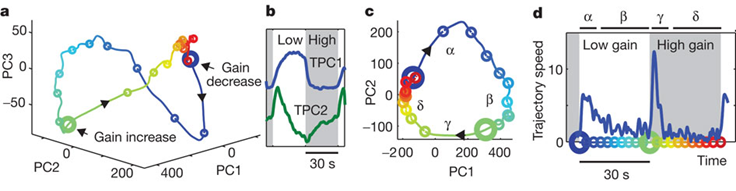

From Ahrens et al., 2012.


Let's try dimensionality reduction in our dataset.

### 5.1 PCA on neural activity timecourse

PCA the neural_response_matrix. Extract PC1, PC2 and PC3 for the neural activity time course. If you do it correctly, it would look like this. Each components has 1200 time points.


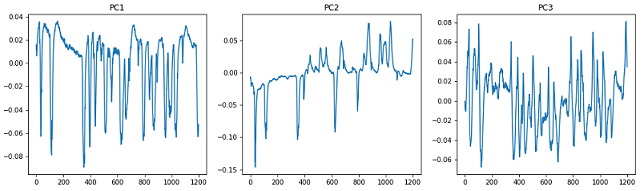

In [41]:
# Excersize: Try PCA of Z-scored neural_response_matrix by using sklearn.decomposition.PCA. Plot the timecourse of PC1, PC2 and PC3







Visualize the weight on the PCA like below. This bwr colormap represents weights for each component of PCs. If successful, it will look like this.

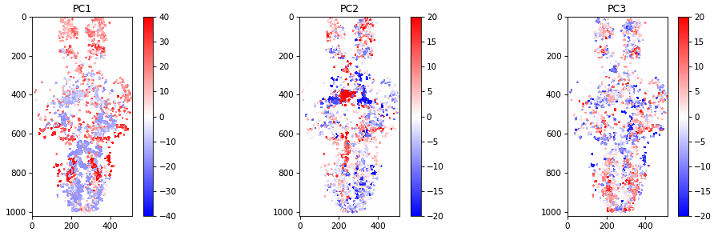

In [42]:
## Excersize: Visualize the weight on each component using the same methods as the correlatin map.






### 5.2 PCA on neural populations

By transposing neural_response_matrix, you can also perform PCA across neural populations. This is suited for visualizating how population dynamics change across time series.

If you plot the time series on the weightss on PC1 and PC2, it will look like this.

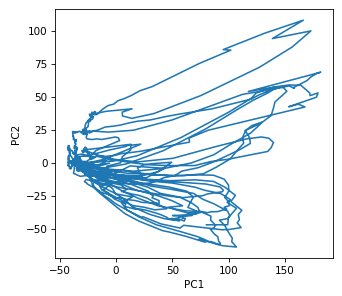

In [9]:
# Excersize: perform PCA across neural populations. Plot the timeseires of neural population dynamics between PC1 and PC2 



OK, this plot looks interesting, but this itself is not interpretable. Let's color them according to when the fish is swimming.
When you do, it will look like this.

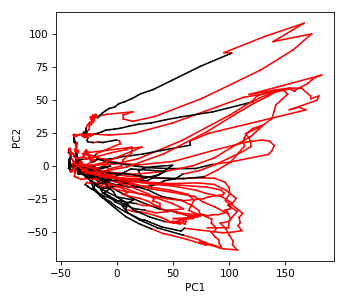

**Note that you need to change line colors for individual time points to generate the above plot.**

Red is when the fish is swimming. Black is when the fish is not swimming. It's clear that swimming push the components  farther than the origin. Let's replicate this.

In [75]:
# Excersize. Plot the above plot by the following steps.
# (1) Load swim_power.
# (2) Detect when the fish is swimming
# (3) Plot PC1 and PC2 for each (t, t+1) pair. Change color when swim power is positive.





Let's do it for forward/backward visual stimuli. Which direction will the components move when there is forward stimuli? What about backward?

In [76]:
# Excersize. Do the above plot for forward stimuli/ backward stimuli






Let's use different colors for different velocity of forward stimuli. Does it look different?

In [98]:
# Excersize. Do the above plot for different velocity of forward stimuli






### 5.3 NNMF (non-negative matrix factorization) on neural activity time course

So far we have been using PCA. But PCA components can go plus and minus and sometimes hard to interpret. Let's put non-negativity constraints so that we can extract more intuitive data. Why it is intuitive? The NMF components will look like this.

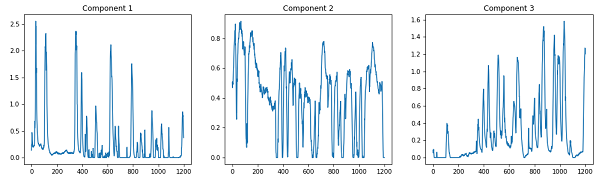


Some of components now looks like neural activity. Note that NMF is an optimization methods and is not a factorization method. Each time you run the code, you will get different answers. Also, because of its non-negative constraints, it cannot factorize minus values. Therefore, we will peform min-max normalization instead of Z-scoring.

Let's use sklearn.decomposition.NMF and try.

In [91]:
# Excersize: perfomr NMF on neural activity timeseries and replicate the above plot of 3 NMF components.







In [93]:
# Excersize: Create spatial maps based on weights for 3 NMF components extracted above. How do they look different from PCA spatial map








And, let's try NMF across neural populations as we did in Section 5.2 and check its temporal dynamics


In [96]:
# Excersize: Perform NMF across neural populations and plot its temporal dynamics between component 1 and 2







In [97]:
# Excersize: Color the NMF dynamics plotted above based on swimming, forward visual stimuli and backward visual stimuli






#### Open question for Section 5: 
#### Please suggest, perform and plot one analysis using dimensionality reduction techqnique we just learned

In [11]:
# Please suggest, perform and plot an analysis from your own idea!""





### This is the end of Kawashima lab python tutorial. Hope you enjoyed it!


